# Preparação Inicial:

In [5]:
# Importação das bibliotecas necessárias
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Carregamento do Conjunto de Dados:

In [6]:
# Carregamento do dataset
train_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/GlobalSolution/TrainingUpdated',
    target_size=(160, 160),
    batch_size=32,
    class_mode='binary'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/GlobalSolution/TestingUpdated',
    target_size=(160, 160),
    batch_size=32,
    class_mode='binary'
)


Found 4485 images belonging to 2 classes.
Found 1311 images belonging to 2 classes.


# Exploração de Dados:

Número de amostras de treinamento: 4485
Número de amostras de teste: 1311
Número de classes: 2
Tamanho das imagens: (160, 160, 3)


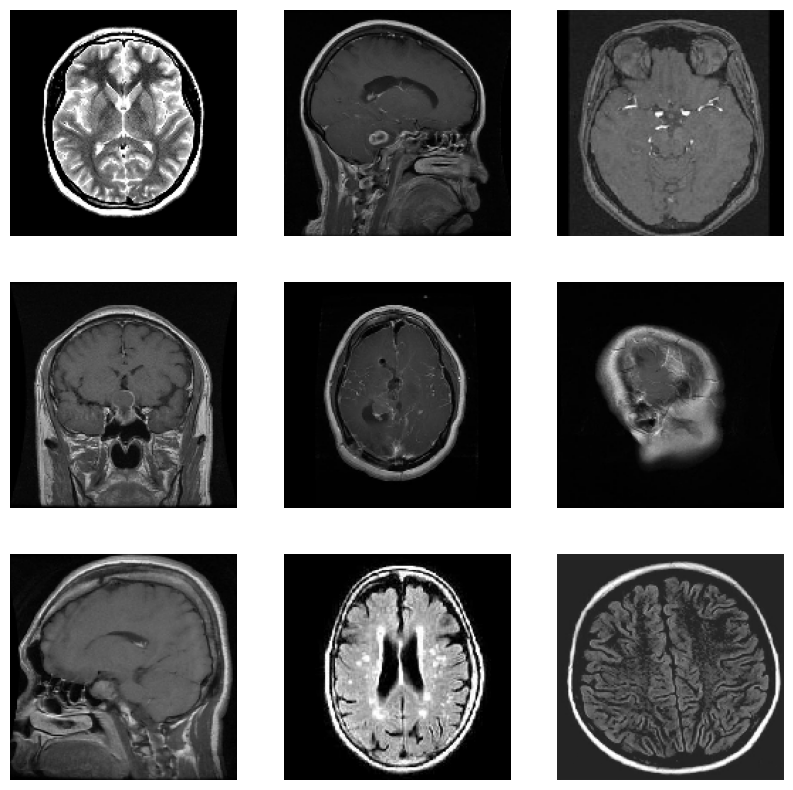

In [7]:
# Exibição de informações sobre o conjunto de dados
print(f"Número de amostras de treinamento: {train_data.samples}")
print(f"Número de amostras de teste: {test_data.samples}")
print(f"Número de classes: {len(train_data.class_indices)}")
print(f"Tamanho das imagens: {train_data.image_shape}")

# Visualização de algumas imagens do conjunto de treinamento
def visualize_train_images(train_data):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        images, _ = next(train_data)  # Obtendo um lote de imagens
        for j in range(9):
            plt.subplot(3, 3, j + 1)
            plt.imshow(images[j])
            plt.axis('off')
    plt.show()

visualize_train_images(train_data)


# Pré-processamento:

Este passo está embutido no ImageDataGenerator com a opção rescale=1./255, utilizado na hora da importação do conjunto de dados

# Criação do Modelo:

In [8]:
# Configuração do modelo
IMG_SHAPE = (160, 160, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
base_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(1, activation='sigmoid')

model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])


9406464/9406464 [==============================] - 0s 0us/step


# Compilação do Modelo:

In [9]:
# Compilação do modelo
base_learning_rate = 0.0001
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# Treinamento do Modelo:

Epoch 1/10
141/141 [==============================] - 890s 6s/step - loss: 0.5419 - accuracy: 0.7148 - val_loss: 0.3768 - val_accuracy: 0.8604
Epoch 2/10
141/141 [==============================] - 139s 989ms/step - loss: 0.3179 - accuracy: 0.8905 - val_loss: 0.2626 - val_accuracy: 0.9298
Epoch 3/10
141/141 [==============================] - 129s 919ms/step - loss: 0.2299 - accuracy: 0.9333 - val_loss: 0.2103 - val_accuracy: 0.9474
Epoch 4/10
141/141 [==============================] - 141s 1000ms/step - loss: 0.1857 - accuracy: 0.9476 - val_loss: 0.1862 - val_accuracy: 0.9474
Epoch 5/10
141/141 [==============================] - 141s 999ms/step - loss: 0.1583 - accuracy: 0.9534 - val_loss: 0.1781 - val_accuracy: 0.9451
Epoch 6/10
141/141 [==============================] - 141s 997ms/step - loss: 0.1411 - accuracy: 0.9588 - val_loss: 0.1628 - val_accuracy: 0.9497
Epoch 7/10
141/141 [==============================] - 143s 1s/step - loss: 0.1283 - accuracy: 0.9605 - val_loss: 0.1516 - val_

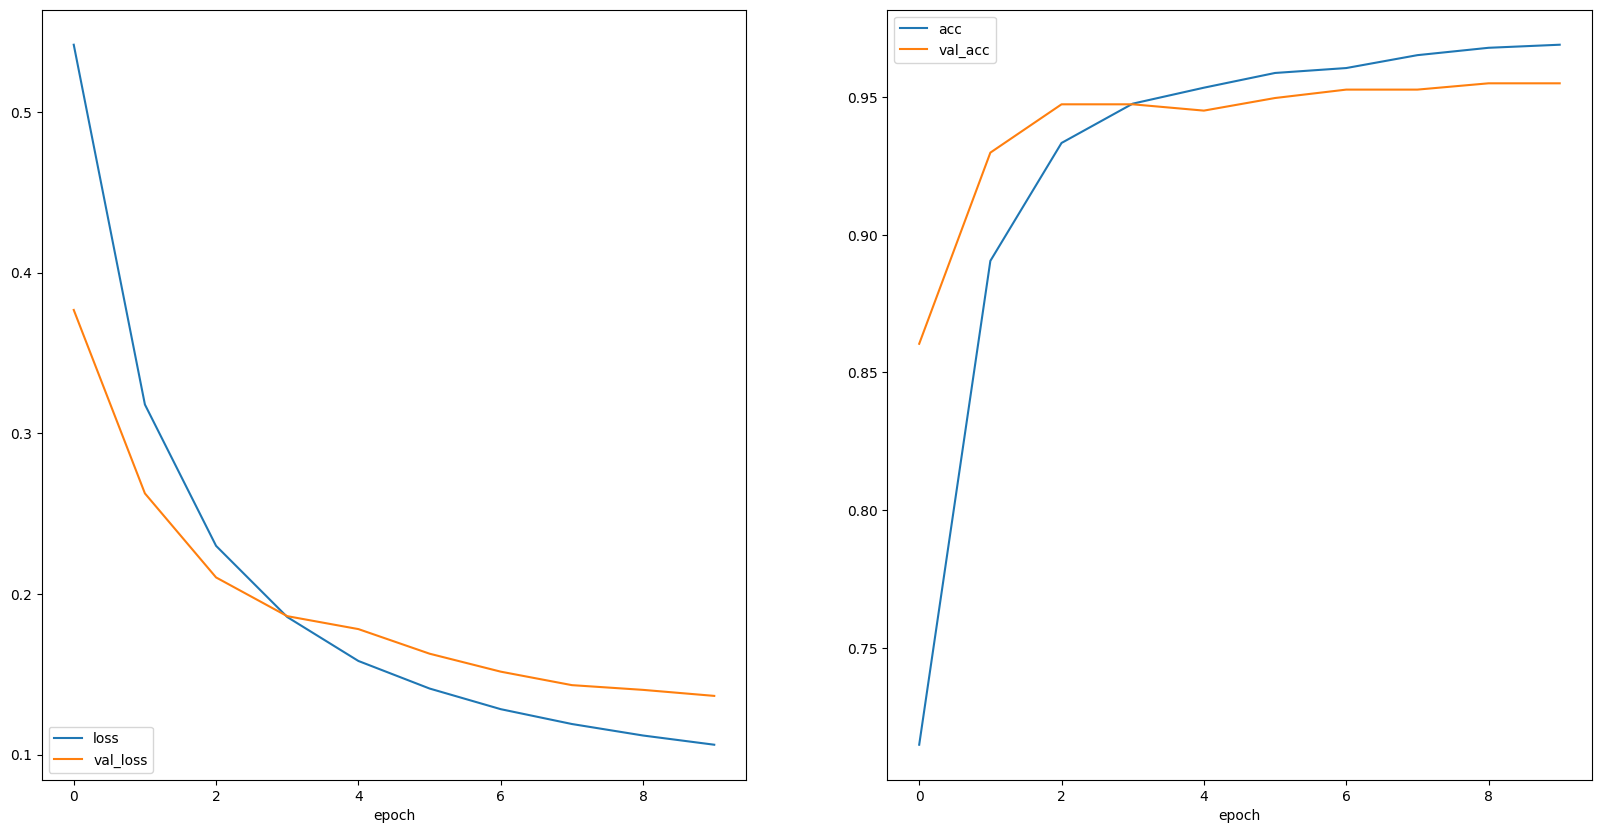

In [10]:
# Treinamento do modelo
initial_epochs = 10
history = model.fit(
    train_data,
    epochs=initial_epochs,
    validation_data=test_data
)

# Função para exibir o histórico de treino do modelo
def plot_history(history):
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='lower left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('epoch')
    plt.legend(['acc', 'val_acc'], loc='upper left')
    plt.show()

plot_history(history)


# Avaliação do Modelo:

In [12]:
# Avaliação do modelo com o conjunto de teste
loss, accuracy = model.evaluate(test_data)
print(f"Acurácia do teste: {accuracy*100}%")


41/41 [==============================] - 45s 1s/step - loss: 0.1366 - accuracy: 0.9550
Acurácia do teste: 95.49961686134338%


# Teste com Imagens da Internet:

1/1 [==============================] - 0s 48ms/step


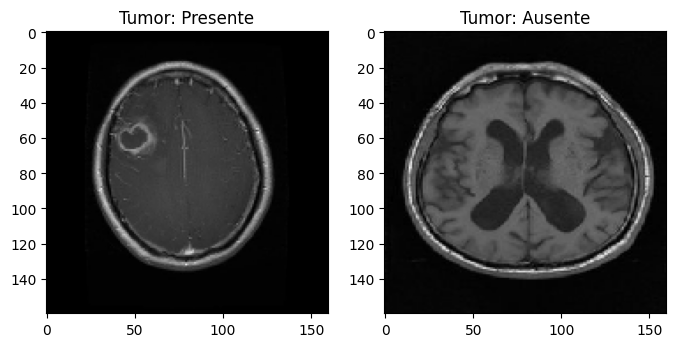

In [16]:
import os
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Função para carregar e pré-processar uma imagem
def load_and_prepare_image(img_path):
    img = image.load_img(img_path, target_size=(160, 160))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return img_array_expanded / 255.0

# Caminhos para as pastas no seu Google Drive

path_to_tumor = '/content/drive/MyDrive/GlobalSolution/TesteComTumor'
path_to_notumor = '/content/drive/MyDrive/GlobalSolution/TesteSemTumor'

# Carregar e preparar as imagens
image_tumor = load_and_prepare_image(os.path.join(path_to_tumor, os.listdir(path_to_tumor)[0]))
image_notumor = load_and_prepare_image(os.path.join(path_to_notumor, os.listdir(path_to_notumor)[0]))

# Fazer as previsões
prediction_tumor = model.predict(image_tumor)
prediction_notumor = model.predict(image_notumor)

# Exibir as imagens e previsões
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_tumor[0])
plt.title(f'Tumor: {"Presente" if prediction_tumor[0] > 0.5 else "Ausente"}')

plt.subplot(1, 2, 2)
plt.imshow(image_notumor[0])
plt.title(f'Tumor: {"Presente" if prediction_notumor[0] > 0.5 else "Ausente"}')

plt.show()